## Optuna tutorial
import optuna 

In [1]:
import optuna as opt
import numpy as np

In [2]:
def function(x):
    return (x-2)**2 * np.sin(x*np.pi)

In [3]:
def objective(trial):
    # invocata dentro la definizione di funzione
    x = trial.suggest_float('x', -10, 10)
    return (x-2)**2 * np.sin(x*np.pi)

#study object to optimize a function
N = 200 # number of trials N

study = opt.create_study(direction = 'minimize')
study.optimize(objective, n_trials = N, show_progress_bar = True)

[I 2023-10-25 14:55:32,776] A new study created in memory with name: no-name-075ef856-cfc7-47f5-93e1-f9101a44575f


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2023-10-25 14:55:33,005] Trial 0 finished with value: -85.15668797962863 and parameters: {'x': -8.735344683008506}. Best is trial 0 with value: -85.15668797962863.
[I 2023-10-25 14:55:33,009] Trial 1 finished with value: 4.715059232385102 and parameters: {'x': -1.1568729444379606}. Best is trial 0 with value: -85.15668797962863.
[I 2023-10-25 14:55:33,012] Trial 2 finished with value: 8.981351834148999 and parameters: {'x': -1.7842095353139626}. Best is trial 0 with value: -85.15668797962863.
[I 2023-10-25 14:55:33,016] Trial 3 finished with value: 13.847298342055899 and parameters: {'x': -3.1731152611706452}. Best is trial 0 with value: -85.15668797962863.
[I 2023-10-25 14:55:33,020] Trial 4 finished with value: 19.01277536680982 and parameters: {'x': 6.660676186026176}. Best is trial 0 with value: -85.15668797962863.
[I 2023-10-25 14:55:33,024] Trial 5 finished with value: 47.51594216961812 and parameters: {'x': -9.890907461447455}. Best is trial 0 with value: -85.15668797962863.


In [4]:
#Evaluating our Optuna Trial 

#Trial migliore
print("best trial:", study.best_trial.number)
#Valore del minimo
print("best accuracy:", study.best_trial.value)
# Iperparametro migliore
print("Best hyperparameters:", study.best_params)

best trial: 170
best accuracy: -110.43504329530879
Best hyperparameters: {'x': -8.52485535981592}


In [5]:
#return all trials in the study
print("All the properties of a Trial:\n\n", study.trials[0])

print("\nthe trial number: ", study.trials[0].number)

All the properties of a Trial:

 FrozenTrial(number=0, state=TrialState.COMPLETE, values=[-85.15668797962863], datetime_start=datetime.datetime(2023, 10, 25, 14, 55, 33, 3980), datetime_complete=datetime.datetime(2023, 10, 25, 14, 55, 33, 5446), params={'x': -8.735344683008506}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=0, value=None)

the trial number:  0


In [6]:
#Accediamo ai vari punti identificati e vediamo come funziona questo algoritmo
x = np.array(N); y = np.array(N)
#salvare il valore di x da vedere
x = [study.trials[i].params['x'] for i in range(0,N)]
y = [study.trials[i].value for i in range(0,N)]
print(x[1])

-1.1568729444379606


In [7]:
from matplotlib import pyplot as plt


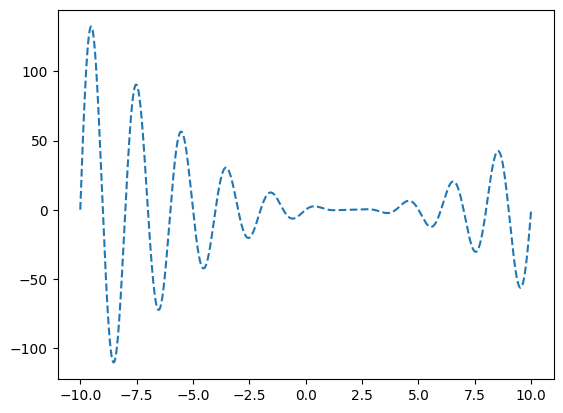

In [8]:
plt.figure(0)
xx = np.linspace(-10,10,100000)
#plt.ylim(-100,100)
plt.plot(xx, function(xx), linestyle = '--')

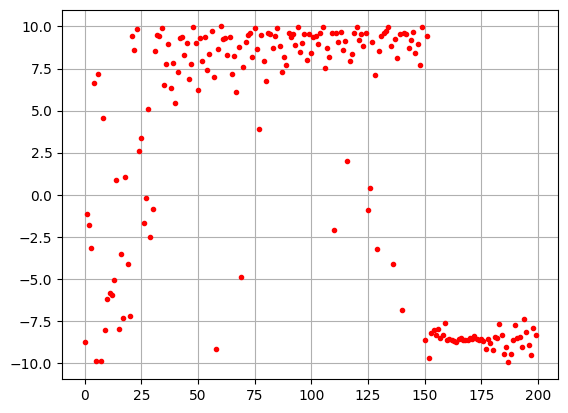

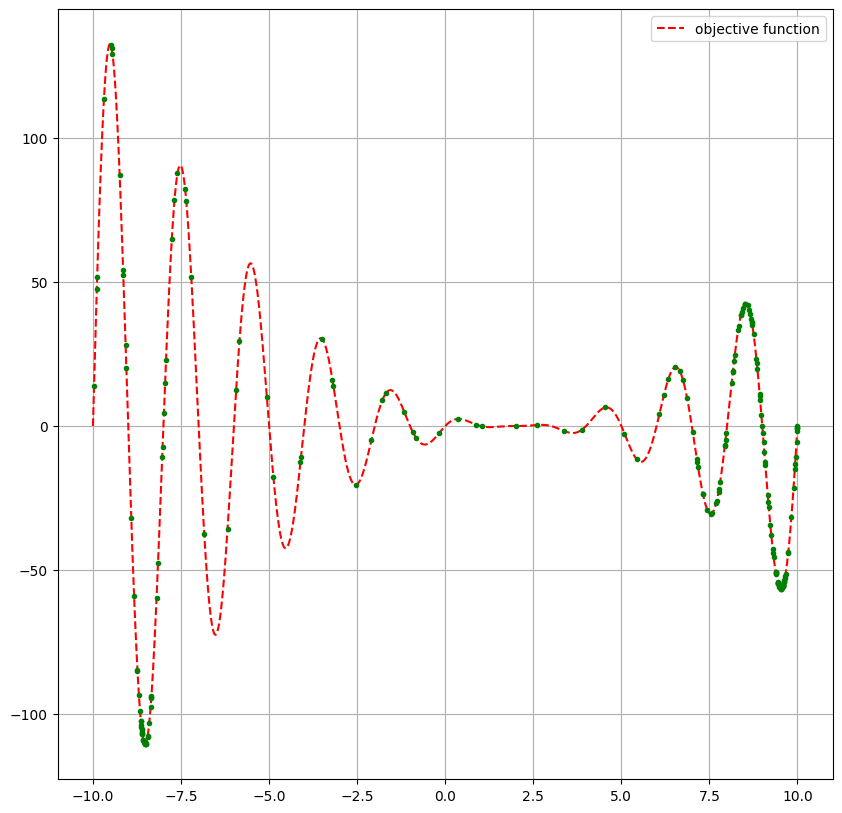

In [11]:
trials_number = np.arange(0,N)
plt.figure(1)
plt.grid()
plt.errorbar(trials_number, x, linestyle = '', marker = '.', color = 'red')
#plt.figure(2)
#plt.errorbar(trials_number, y, linestyle = '', marker = 'x', color = 'green')
plt.figure(4, figsize = [10,10])
plt.grid()
#plt.ylim(-100,100)
plt.errorbar(x, y, linestyle = '', marker = '.', color = 'green')
plt.plot(xx,function(xx), linestyle = '--', color = 'red', label = 'objective function')
plt.legend()